In [3]:
%reset
%matplotlib inline

import netCDF4 as nc
import cmocean
import numpy as np
import xarray as xr
import xrft
from xgcm import Grid
import matplotlib.pyplot as plt
import scipy.interpolate

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/
fs_025 = xr.open_dataset('static.nc', decode_times=False)
av_025 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/
fs_0125 = xr.open_dataset('static.nc', decode_times=False)
av_0125 = xr.open_dataset('averages_00004502.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
fs_00625 = xr.open_dataset('static.nc', decode_times=False)
av_00625 = xr.open_dataset('averages_00006002.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/
fs_003125 = xr.open_dataset('static.nc', decode_times=False)
av_003125 = xr.open_dataset('averages_00001402.nc', decode_times=False)


%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [5]:
grid_025= Grid(av_025, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
grid_0125= Grid(av_0125, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
grid_00625= Grid(av_00625, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
grid_003125= Grid(av_003125, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


#Interpolating surface u,v to be on the same grid points. Using only 100 days, or 20 time steps:
dx_025= grid_025.interp(fs_025.dxCu,axis='X'); dy_025= grid_025.interp(fs_025.dyCv,axis='Y')
u_025 = grid_025.interp(av_025.u[0:20,0,:,:],axis='X'); v_025 = grid_025.interp(av_025.v[0:20,0,:,:],axis='Y')

dx_0125= grid_0125.interp(fs_0125.dxCu,axis='X'); dy_0125= grid_0125.interp(fs_0125.dyCv,axis='Y')
u_0125 = grid_0125.interp(av_0125.u[0:20,0,:,:],axis='X'); v_0125 = grid_0125.interp(av_0125.v[0:20,0,:,:],axis='Y')

dx_00625= grid_00625.interp(fs_00625.dxCu,axis='X'); dy_00625= grid_00625.interp(fs_00625.dyCv,axis='Y')
u_00625 = grid_00625.interp(av_00625.u[0:20,0,:,:],axis='X'); v_00625 = grid_00625.interp(av_00625.v[0:20,0,:,:],axis='Y')

dx_003125= grid_003125.interp(fs_003125.dxCu,axis='X'); dy_003125= grid_003125.interp(fs_003125.dyCv,axis='Y')
u_003125 = grid_003125.interp(av_003125.u[0:20,0,:,:],axis='X'); v_003125 = grid_003125.interp(av_003125.v[0:20,0,:,:],axis='Y')


#Ld = av_003125.Rd1[:].mean('time')

In [6]:
print(u_025.shape,v_025.shape)
print(u_003125.shape,v_003125.shape)


(20, 560, 240) (20, 560, 240)
(20, 4480, 1920) (20, 4480, 1920)


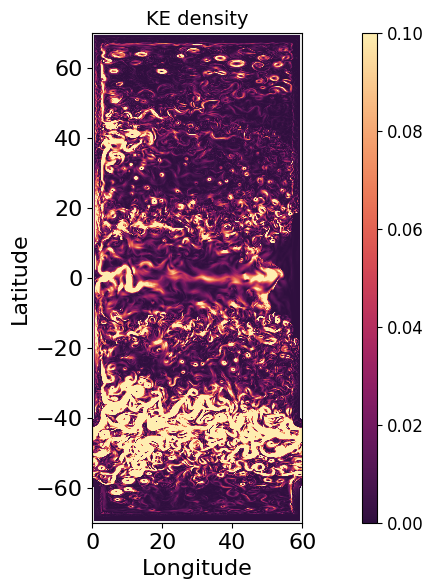

In [7]:
#Plotting surface KE for whole domain @1/32 degree.
fig = plt.figure(figsize=(5, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('KE density',fontsize=14)

KE=(u_003125**2+v_003125**2)*0.5
plotted =ax1.pcolor(fs_003125.geolon,fs_003125.geolat,KE[-1,:],cmap=cmocean.cm.matter_r,vmin=0,vmax=1e-1,shading='auto')
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

## We will now change the x-coordinates to be in units of meters rather than degrees.

In [8]:
xi_025=dx_025.cumsum(axis=1)-dx_025[:,0] #subtract first dx so that we start at x=0m.
xi_0125=dx_0125.cumsum(axis=1)-dx_0125[:,0]
xi_00625=dx_00625.cumsum(axis=1)-dx_00625[:,0]
xi_003125=dx_003125.cumsum(axis=1)-dx_003125[:,0]

In [9]:
fs_025.geolat[480,0]
u_025.shape

(20, 560, 240)

### Computing the 1D spectrum at 60 deg. North

In [10]:
boundary=10 #cutting this number of points off of each boundary. 
for i in range(480,481):
    xline= xi_025[i,boundary:-boundary]
    uline= u_025[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_025[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_025=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_025= (ekeiso_025.freq_xh*1e3*2*np.pi)       
    centroid_025 = np.nansum(ekeiso_025*wavenumber_025)/np.nansum(ekeiso_025)


boundary=20 #cutting this number of points off of each boundary. 
for i in range(960,961):
    xline= xi_0125[i,boundary:-boundary]
    uline= u_0125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_0125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_0125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_0125= (ekeiso_0125.freq_xh*1e3*2*np.pi)       
    centroid_0125 = np.nansum(ekeiso_0125*wavenumber_0125)/np.nansum(ekeiso_0125)
    
boundary=40 #cutting this number of points off of each boundary. 
for i in range(1920,1921):
    xline= xi_00625[i,boundary:-boundary]
    uline= u_00625[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_00625[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_00625=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_00625= (ekeiso_00625.freq_xh*1e3*2*np.pi)       
    centroid_00625 = np.nansum(ekeiso_00625*wavenumber_00625)/np.nansum(ekeiso_00625)
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(3840,3841):
    xline= xi_003125[i,boundary:-boundary]
    uline= u_003125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

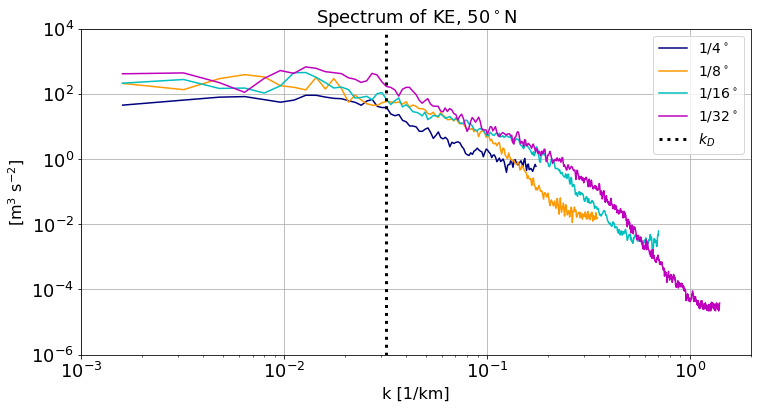

In [11]:
fig, ax = plt.subplots(figsize=(12,6))


plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_0125,ekeiso_0125,'-',color=[1,.6,0],label='$1/8^\circ$')
plt.plot(wavenumber_00625,ekeiso_00625,'-c',label='$1/16^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,'-m',label='$1/32^\circ$')
#plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$ = 1/(%.1f km)'%(1/Ld_wavenumber))
plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')

plt.xscale('log')
plt.yscale('log')
plt.title('Spectrum of KE, 50$^\circ$N',fontsize=18)
plt.ylim([1e-6, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.xlabel('$\kappa_r (1/km)$')
plt.legend(fontsize=14)

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

<xarray.DataArray 'geolat' ()>
array(-49.875)
Coordinates:
    xh       float64 0.125
    yh       float64 -49.88
Attributes:
    long_name:     Latitude of tracer (T) points
    units:         degrees_north
    cell_methods:  time: point

### Computing the 1D spectrum at 15 deg. North

In [11]:
boundary=10 #cutting this number of points off of each boundary. 
for i in range(340,341):
    xline= xi_025[i,boundary:-boundary]
    uline= u_025[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_025[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_025=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_025= (ekeiso_025.freq_xh*1e3*2*np.pi)       
    centroid_025 = np.nansum(ekeiso_025*wavenumber_025)/np.nansum(ekeiso_025)


boundary=20 #cutting this number of points off of each boundary. 
for i in range(680,681):
    xline= xi_0125[i,boundary:-boundary]
    uline= u_0125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_0125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_0125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_0125= (ekeiso_0125.freq_xh*1e3*2*np.pi)       
    centroid_0125 = np.nansum(ekeiso_0125*wavenumber_0125)/np.nansum(ekeiso_0125)
    
boundary=40 #cutting this number of points off of each boundary. 
for i in range(1360,1361):
    xline= xi_00625[i,boundary:-boundary]
    uline= u_00625[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_00625[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_00625=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_00625= (ekeiso_00625.freq_xh*1e3*2*np.pi)       
    centroid_00625 = np.nansum(ekeiso_00625*wavenumber_00625)/np.nansum(ekeiso_00625)
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(2720,2721):
    xline= xi_003125[i,boundary:-boundary]
    uline= u_003125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)

Text(0, 0.5, '[m$^3$ s$^{-2}$]')

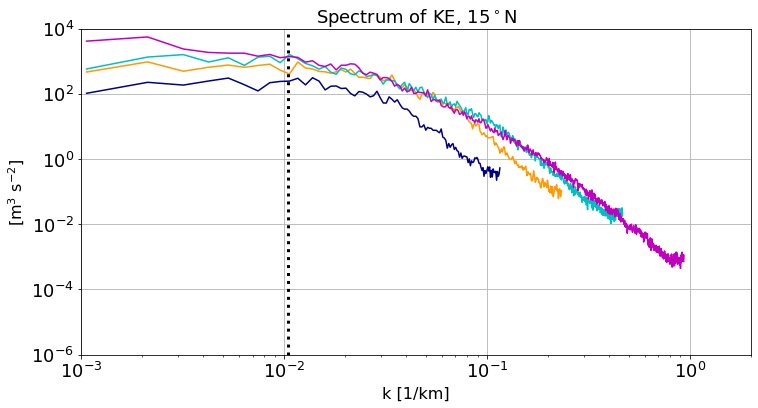

In [12]:
fig, ax = plt.subplots(figsize=(12,6))


plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_0125,ekeiso_0125,'-',color=[1,.6,0],label='$1/8^\circ$')
plt.plot(wavenumber_00625,ekeiso_00625,'-c',label='$1/16^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,'-m',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-6,1e4],':k',linewidth=3,label='$k_D$ = 1/(%.1f km)'%(1/Ld_wavenumber))

plt.xscale('log')
plt.yscale('log')
plt.title('Spectrum of KE, 15$^\circ$N',fontsize=18)
plt.ylim([1e-6, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.xlabel('$\kappa_r (1/km)$')
#plt.legend(fontsize=14)

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

### Computing the 1D spectrum at 60 deg. South

In [14]:
boundary=10 #cutting this number of points off of each boundary. 
for i in range(80,81):
    xline= xi_025[i,boundary:-boundary]
    uline= u_025[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_025[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_025=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_025= (ekeiso_025.freq_xh*1e3*2*np.pi)       
    centroid_025 = np.nansum(ekeiso_025*wavenumber_025)/np.nansum(ekeiso_025)


boundary=20 #cutting this number of points off of each boundary. 
for i in range(160,161):
    xline= xi_0125[i,boundary:-boundary]
    uline= u_0125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_0125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_0125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_0125= (ekeiso_0125.freq_xh*1e3*2*np.pi)       
    centroid_0125 = np.nansum(ekeiso_0125*wavenumber_0125)/np.nansum(ekeiso_0125)
    
boundary=40 #cutting this number of points off of each boundary. 
for i in range(320,321):
    xline= xi_00625[i,boundary:-boundary]
    uline= u_00625[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_00625[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_00625=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_00625= (ekeiso_00625.freq_xh*1e3*2*np.pi)       
    centroid_00625 = np.nansum(ekeiso_00625*wavenumber_00625)/np.nansum(ekeiso_00625)
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(640,641):
    xline= xi_003125[i,boundary:-boundary]
    uline= u_003125[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)  

Text(0, 0.5, '[m$^3$ s$^{-2}$]')

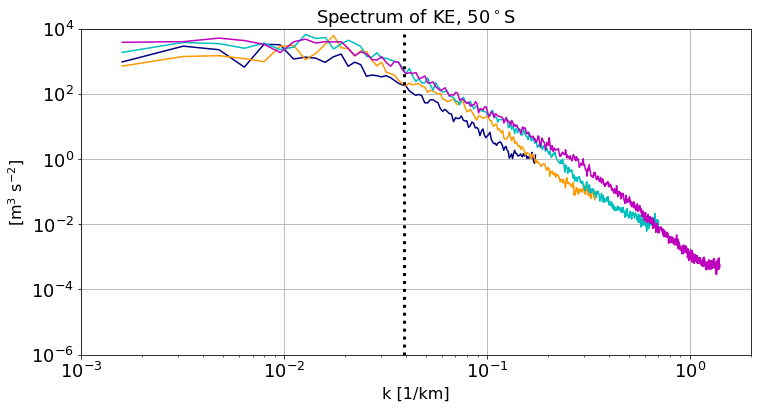

In [16]:
fig, ax = plt.subplots(figsize=(12,6))


plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_0125,ekeiso_0125,'-',color=[1.,0.6,0],label='$1/8^\circ$')
plt.plot(wavenumber_00625,ekeiso_00625,'-c',label='$1/16^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,'-m',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-6,1e4],':k',linewidth=3,label='$k_D$ = 1/(%.1f km)'%(1/Ld_wavenumber))

plt.xscale('log')
plt.yscale('log')
plt.title('Spectrum of KE, 50$^\circ$S',fontsize=18)
plt.ylim([1e-6, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.xlabel('$\kappa_r (1/km)$')
#plt.legend(fontsize=14)

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)